In [1]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import tensorflow as tf
import tensorflow.keras as keras
import sys
sys.modules['keras'] = keras
#from keras.models import Model
#from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation, AveragePooling1D, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation, AveragePooling1D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adamax
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
print(tf.__version__)
print(tf.config.list_physical_devices())
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2.10.1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Loading Data

In [3]:
df_train = pd.read_csv("COVID19CTS224/S224/train.csv")
dataset_train = []

for i in df_train['filename']:
    dataset_train.append(keras.preprocessing.image.load_img("COVID19CTS224/S224/"+i,target_size=(224,224)))

for i in range(0,len(dataset_train)):
    dataset_train[i] = keras.preprocessing.image.img_to_array(dataset_train[i])
    dataset_train[i] = preprocess_input(dataset_train[i])

In [4]:
len(dataset_train)

2022

In [5]:
X_train = np.asarray(dataset_train)
Y_train = np.reshape(np.asarray(df_train['label']),(2022,1))
Y_train = keras.utils.to_categorical(Y_train,2)

In [6]:
df_test = pd.read_csv("COVID19CTS224/S224/test.csv")
dataset_test = []

for i in df_test['filename']:
    dataset_test.append(keras.preprocessing.image.load_img("COVID19CTS224/S224/"+i,target_size=(224,224)))

for i in range(0,len(dataset_test)):
    dataset_test[i] = keras.preprocessing.image.img_to_array(dataset_test[i])
    dataset_test[i] = preprocess_input(dataset_test[i])

In [7]:
len(dataset_test)

400

In [8]:
X_test = np.asarray(dataset_test)
Y_test = np.reshape(np.asarray(df_test['label']),(400,1))
Y_test = keras.utils.to_categorical(Y_test,2)

In [9]:
df_val = pd.read_csv("COVID19CTS224/S224/val.csv")
dataset_val = []

for i in df_val['filename']:
    dataset_val.append(keras.preprocessing.image.load_img("COVID19CTS224/S224/"+i,target_size=(224,224)))

for i in range(0,len(dataset_val)):
    dataset_val[i] = keras.preprocessing.image.img_to_array(dataset_val[i])
    dataset_val[i] = preprocess_input(dataset_val[i])

In [10]:
len(dataset_val)

60

In [11]:
X_val = np.asarray(dataset_val)
Y_val = np.reshape(np.asarray(df_val['label']),(60,1))
Y_val = keras.utils.to_categorical(Y_val,2)

## Constructing and training CNN from scratch

In [13]:
#May have to run this code twice
model1 = keras.applications.ResNet50()
inp = Flatten()(model1.output)
layer2 = Dense(256, activation='relu')(inp)
layer3 = Dense(128, activation='relu')(layer2)
layer4 = Dense(64, activation='relu')(layer3)
layer5 = Dense(32, activation='relu')(layer4)
layer6 = Dense(8, activation='relu')(layer5)
layer7 = Dense(4, activation='relu')(layer6)
layer8 = Dense(2, activation='softmax')(layer7)

modelScratch = Model(inputs = model1.input, outputs = layer8)
modelScratch.compile(optimizer= Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
modelScratch.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [14]:
#Training the model
modelScratch.fit(X_train, Y_train, batch_size=16, epochs=20, validation_data=(X_val, Y_val))

Epoch 1/20
127/127 [==============================] - 34s 213ms/step - loss: 0.5584 - accuracy: 0.7725 - val_loss: 0.9521 - val_accuracy: 0.5333
Epoch 2/20
127/127 [==============================] - 25s 195ms/step - loss: 0.3254 - accuracy: 0.8808 - val_loss: 0.4593 - val_accuracy: 0.8667
Epoch 3/20
127/127 [==============================] - 25s 196ms/step - loss: 0.2605 - accuracy: 0.9055 - val_loss: 0.4422 - val_accuracy: 0.9000
Epoch 4/20
127/127 [==============================] - 25s 196ms/step - loss: 0.1697 - accuracy: 0.9407 - val_loss: 0.8644 - val_accuracy: 0.7333
Epoch 5/20
127/127 [==============================] - 25s 198ms/step - loss: 0.1534 - accuracy: 0.9505 - val_loss: 0.3532 - val_accuracy: 0.9000
Epoch 6/20
127/127 [==============================] - 25s 196ms/step - loss: 0.0948 - accuracy: 0.9674 - val_loss: 0.2766 - val_accuracy: 0.9333
Epoch 7/20
127/127 [==============================] - 25s 194ms/step - loss: 0.0620 - accuracy: 0.9812 - val_loss: 0.4398 - val_ac

In [18]:
modelScratch.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 91ms/step - loss: 0.0461 - accuracy: 0.9850


[0.04610366374254227, 0.9850000143051147]

## Constructing and training CNN using transfer learning

In [19]:
model2 = ResNet50(weights='imagenet')

for layer in model2.layers[:165]:
   layer.trainable = False
inp2 = Flatten()(model2.output)
layer2_1 = Dense(512, activation='relu')(inp2)
layer2_2 = Dense(256, activation='relu')(layer2_1)
layer2_3 = Dense(128, activation='relu')(layer2_2)
layer2_4 = Dense(64, activation='relu')(layer2_3)
layer2_5 = Dense(32, activation='relu')(layer2_4)
layer2_6 = Dense(8, activation='relu')(layer2_5)
layer2_7 = Dense(4, activation='relu')(layer2_6)
layer2_8 = Dense(2, activation='softmax')(layer2_7)

modelTransfer = Model(inputs = model2.input, outputs = layer2_8)
modelTransfer.compile(optimizer= Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
modelTransfer.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [24]:
#Training the model
modelTransfer.fit(X_train, Y_train, batch_size=16, epochs=20, validation_data=(X_val, Y_val))

Epoch 1/20
127/127 [==============================] - 11s 71ms/step - loss: 0.5353 - accuracy: 0.8348 - val_loss: 0.8202 - val_accuracy: 0.7167
Epoch 2/20
127/127 [==============================] - 8s 67ms/step - loss: 0.3533 - accuracy: 0.9263 - val_loss: 0.4269 - val_accuracy: 0.9000
Epoch 3/20
127/127 [==============================] - 9s 68ms/step - loss: 0.2435 - accuracy: 0.9594 - val_loss: 0.6986 - val_accuracy: 0.8167
Epoch 4/20
127/127 [==============================] - 8s 66ms/step - loss: 0.1150 - accuracy: 0.9792 - val_loss: 0.0609 - val_accuracy: 0.9833
Epoch 5/20
127/127 [==============================] - 9s 68ms/step - loss: 0.0735 - accuracy: 0.9822 - val_loss: 0.1514 - val_accuracy: 0.9333
Epoch 6/20
127/127 [==============================] - 9s 68ms/step - loss: 0.0736 - accuracy: 0.9817 - val_loss: 0.1490 - val_accuracy: 0.9667
Epoch 7/20
127/127 [==============================] - 9s 68ms/step - loss: 0.0348 - accuracy: 0.9896 - val_loss: 0.0634 - val_accuracy: 0.966

In [25]:
modelTransfer.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 91ms/step - loss: 0.1120 - accuracy: 0.9750


[0.11202529072761536, 0.9750000238418579]

## Visualizing with GradCAM

In [26]:
#https://keras.io/examples/vision/grad_cam/

import tensorflow as tf

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)
  
    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [27]:
#https://keras.io/examples/vision/grad_cam/

from matplotlib import cm
from matplotlib import image as mpimg
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    #display(Image.open(cam_path))

    image = mpimg.imread(cam_path)
    plt.imshow(image)
    plt.show()

In [31]:
gradPath=[]
gradArray=[]

for i in df_val['filename']:
    gradPath.append("COVID19CTS224/S224/"+i)
    
for i in gradPath:
    gradArray.append(preprocess_input(get_img_array(i,size=(224,224))))

In [34]:
import random

def printGradCam(model, imgArray, layer):
    gradArray = imgArray
    modelName = model
    modelName.layers[-1].activation = None
    decode_predictions = keras.applications.xception.decode_predictions

    for i in random.sample(range(0, len(gradArray)), 5):
        print(i)
        pred = modelName.predict(gradArray[i])
        #last_conv_layer_name = layer
        heatmap = make_gradcam_heatmap(gradArray[i], modelName, layer)
        #print(heatmap)
        #plt.matshow(heatmap)
        #print(x)
        #plt.show()
        save_and_display_gradcam(gradPath[i], heatmap)

6
1/1 [==============================] - 0s 19ms/step


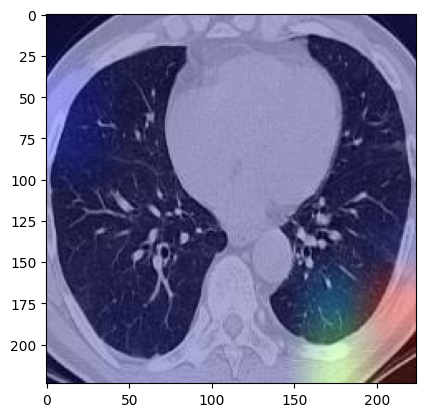

11
1/1 [==============================] - 0s 33ms/step


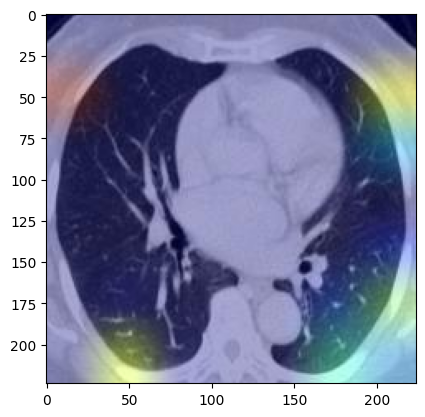

39
1/1 [==============================] - 0s 19ms/step


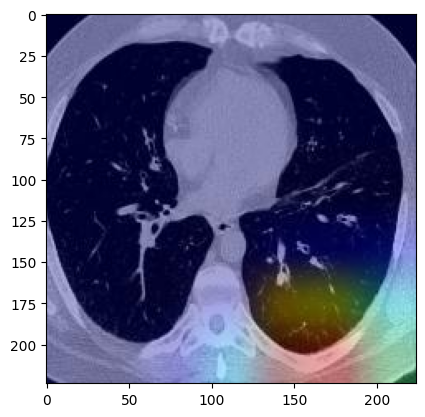

38
1/1 [==============================] - 0s 19ms/step


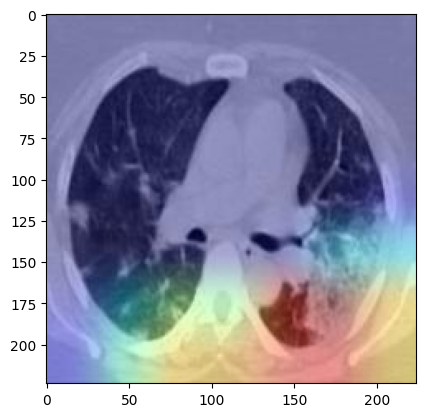

52
1/1 [==============================] - 0s 19ms/step


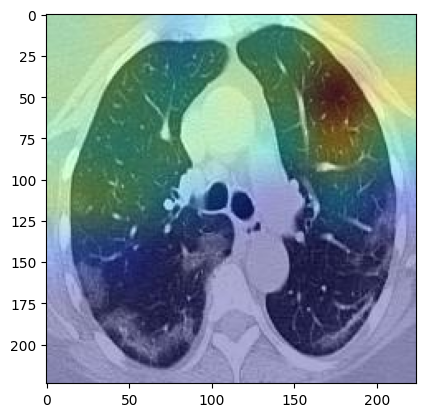

In [35]:
printGradCam(modelScratch, gradArray, "conv5_block3_3_conv")

55
1/1 [==============================] - 1s 572ms/step


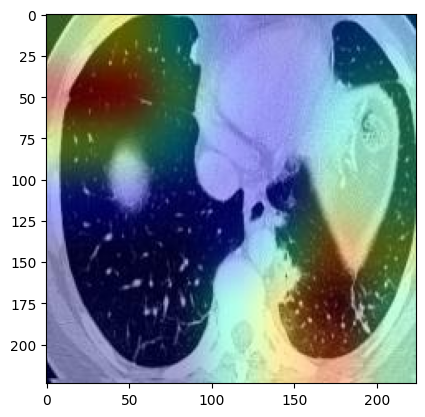

17
1/1 [==============================] - 0s 19ms/step


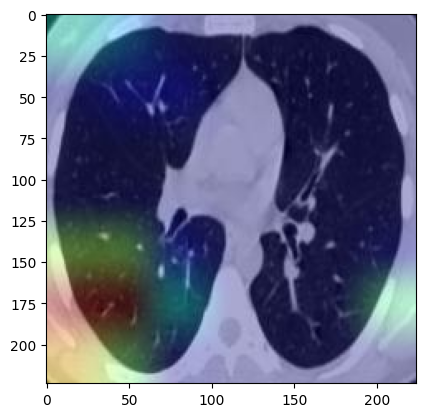

6
1/1 [==============================] - 0s 23ms/step


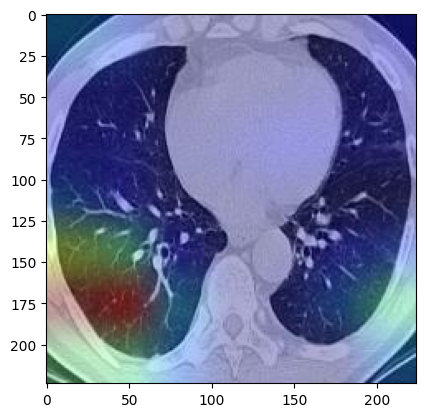

50
1/1 [==============================] - 0s 22ms/step


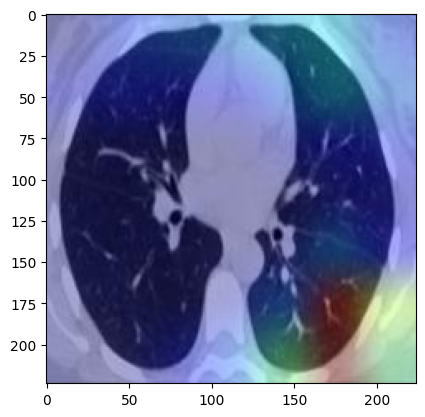

27
1/1 [==============================] - 0s 21ms/step


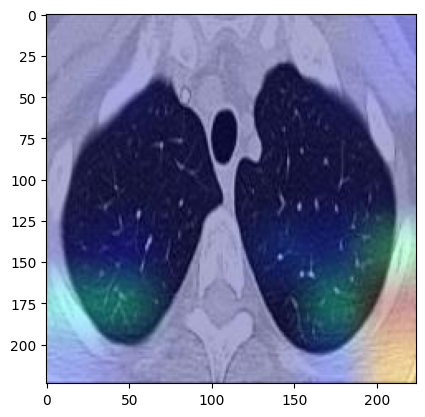

In [36]:
printGradCam(modelTransfer, gradArray, "conv5_block3_3_conv")

## Visualizing with EigenCam

In [46]:
#https://github.com/shyhyawJou/Eigen-CAM-Tensorflow

import cv2
import numpy as np
import logging
import tensorflow as tf



class CAM:
    '''
    Base Class
    '''
    def __init__(self, model, device='cuda', preprocess=None, layer_name=None):  
        if preprocess is None:
            logging.warning('Your image preprocess is None, if your preprocess '
                            'is wrapped in your Keras model, you can ignore '
                            'this message.')

        if layer_name is None:
            raise ValueError('You should specify layer name !!!')
        else:
            try:
                layer = model.get_layer(layer_name).output
            except:
                raise ValueError(f'There is no layer named "{layer_name}" in the model')
        
        self.layer_name = layer_name
        self.prep = preprocess
        self.device = 'GPU' if device == 'cuda' else 'CPU'
        self.model = tf.keras.Model(model.input, 
                                    {'output': model.output, 
                                     'feature': layer})      
    
    def get_heatmap(self, img):
        pass
                                         
    def _check(self, feature):
        if feature.ndim != 4 or feature.shape[2] * feature.shape[3] == 1:
            raise ValueError(f'Got invalid shape of feature map: {feature.shape}, '
                              'please specify another layer to plot heatmap.') 



class EigenCAM(CAM):
    def __init__(self, model, device='cuda', preprocess=None, layer_name=None):
        super().__init__(model, device, preprocess, layer_name)

    def get_heatmap(self, img):
        with tf.device(self.device):
            output = self.model(img[None] if self.prep is None else self.prep(img)[None])
            feature = tf.transpose(output['feature'], [0, 3, 1, 2])
            self._check(feature)
            
            s, u, v = tf.linalg.svd(feature, full_matrices=True)
            vT = tf.transpose(v, [0, 1, 3, 2])

            cam = u[..., 0, None] @ s[..., 0, None, None] @ vT[..., 0, None, :]
            cam = tf.reduce_sum(cam, 1)
            cam -= tf.reduce_min(cam)
            cam = cam / tf.reduce_max(cam) * 255
            cam = cam.numpy().transpose(1, 2, 0).astype(np.uint8)
            cam = cv2.resize(cam, img.shape[:2][::-1])
            cam = cv2.applyColorMap(cam, cv2.COLORMAP_JET)[..., ::-1]       
            
            overlay = np.uint8(0.6 * img + 0.4 * cam)
            
        return output['output'], overlay

In [47]:
#https://github.com/shyhyawJou/Eigen-CAM-Tensorflow

import argparse

def get_arg():
    parser = argparse.ArgumentParser()
    parser.add_argument('-m', help='tensorflow model path (keras saved model folder)')
    parser.add_argument('-d', default='cpu', help='device ("cpu" or "cuda")')
    parser.add_argument('-img', help='img path')
    parser.add_argument('-layer', help='layer name to plot heatmap')
    return parser.parse_args()
    



def main():
    arg = get_arg()

    preprocess = tf.keras.Sequential([
        tf.keras.layers.Resizing(224, 224),
        tf.keras.layers.Rescaling(1 / 127.5, -1),
    ])
   
    device = arg.d
    if device == 'cuda' and len(tf.config.list_physical_devices('GPU')) == 0:
        raise ValueError('There is no cuda !!!')
    
    if arg.m is None:
        model = tf.keras.applications.MobileNetV2(classifier_activation=None)
    else:
        model = tf.keras.models.load_model(arg.m)
    model.summary()
        
    cam_obj = EigenCAM(model, arg.d, preprocess, arg.layer)
    
    print('\ndevice:', arg.d)
    print('layer Name to plot heatmap:', cam_obj.layer_name)
    print('img:', arg.img)
    
    img = np.array(Image.open(arg.img).convert('RGB'))
    # output is tf Tensor, overlay is ndarray
    output, overlay = cam_obj.get_heatmap(img)
    print('\nPredict label:', np.argmax(output, 1).item())
    
    Image.fromarray(overlay).show()

In [56]:
def printEigenCam(model, imgArray, layer):

    preprocess = tf.keras.Sequential([
        tf.keras.layers.Resizing(224, 224),
        tf.keras.layers.Rescaling(1 / 127.5, -1),
    ])

    cam_obj = EigenCAM(model, "gpu", preprocess, layer)

    for i in random.sample(range(0, len(imgArray)), 5):
        print(i)
        img = np.array(Image.open(imgArray[i]).convert('RGB'))
        # output is tf Tensor, overlay is ndarray
        output, overlay = cam_obj.get_heatmap(img)
        
        plt.matshow(overlay)
        plt.show()

30


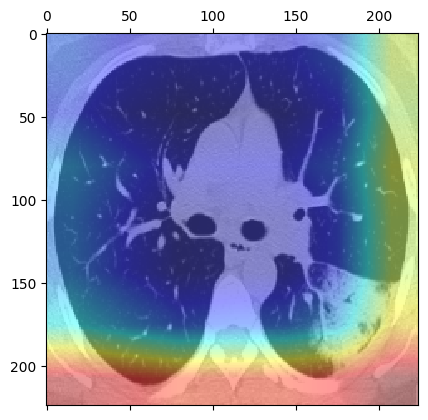

31


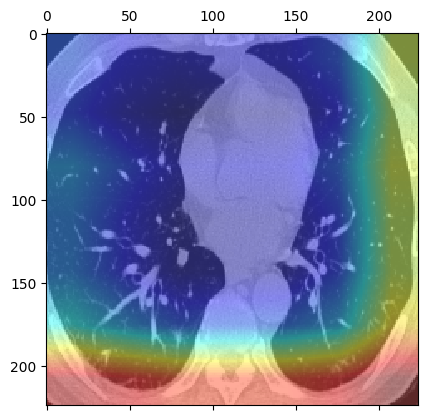

5


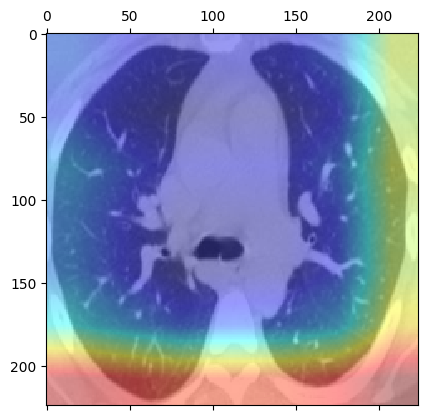

36


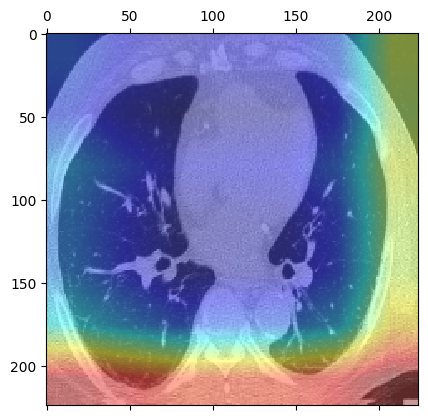

59


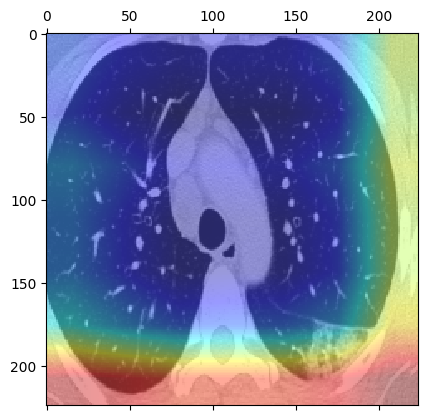

In [59]:
printEigenCam(modelScratch, gradPath, "conv5_block3_3_conv")

38


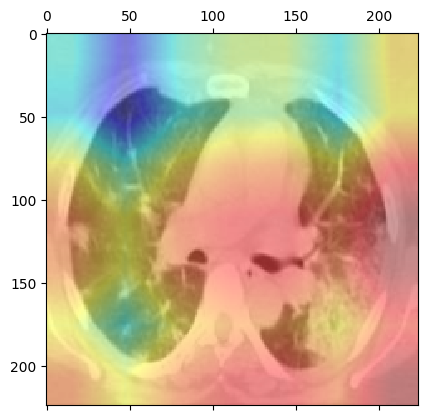

18


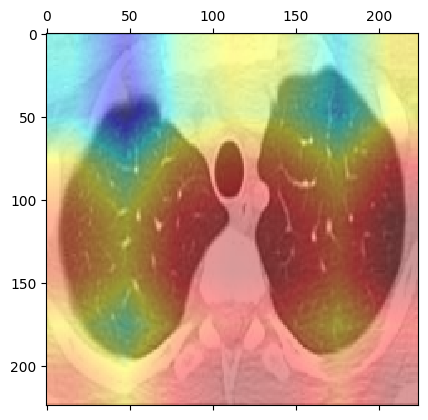

40


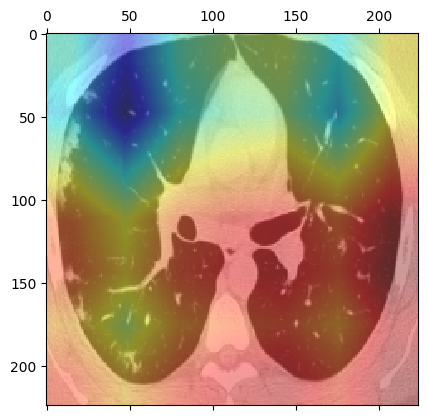

58


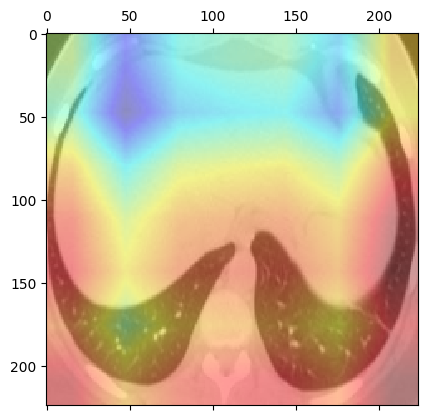

48


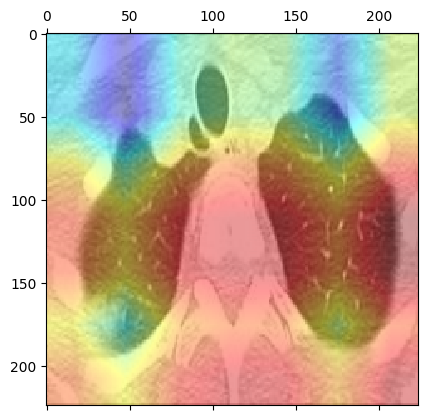

In [60]:
printEigenCam(modelTransfer, gradPath, "conv5_block3_3_conv")